In [ ]:
import pandas as pd

df = pd.read_csv("malicious_phish.csv")

print("Premières lignes du dataset :")
display(df.head())


Distribution des types d'URL :
type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


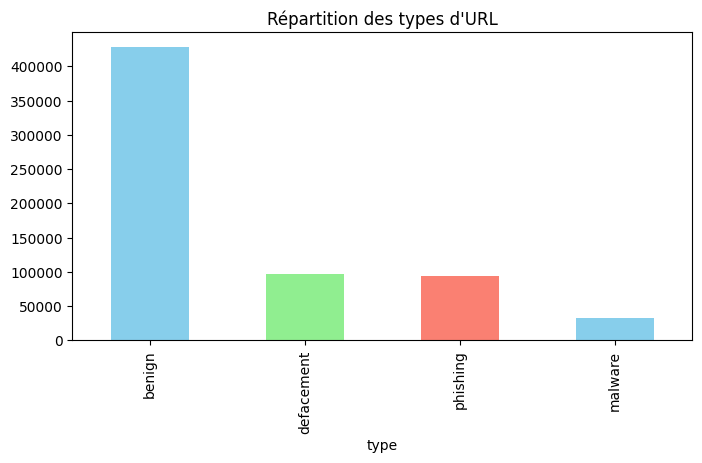

In [3]:
import pandas as pd
df = pd.read_csv("malicious_phish.csv")

print("\nDistribution des types d'URL :")
print(df['type'].value_counts())

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Répartition des types d'URL")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(
    analyzer='char', 
    ngram_range=(3, 5),  
    max_features=5000
)

X = vectorizer.fit_transform(df['url'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced' 
)
model.fit(X_train, y_train)

Vectorisation : Les URLs sont transformées en vecteurs TF-IDF basés sur des n-grams de caractères (e.g., "htt", "ttp").

Split des données :

80% des données pour l'entraînement (X_train, y_train).

20% des données pour le test (X_test, y_test).

Modèle : Un modèle de régression logistique multinomial est entraîné pour prédire le type d'URL (benign, phishing, defacement).

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced' 
)
X = vectorizer.fit_transform(df['url'])
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)



y_pred = model.predict(X_test)

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))

feature_names = vectorizer.get_feature_names_out()
coefs = model.coef_

print("\nTop 10 caractéristiques pour 'phishing' :")
print([feature_names[i] for i in np.argsort(coefs[0])[-10:]])

C:\Users\GameZone_Dz\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Rapport de classification :
              precision    recall  f1-score   support

      benign       0.98      0.94      0.96     85778
  defacement       0.97      0.99      0.98     19104
     malware       0.91      0.95      0.93      6521
    phishing       0.79      0.90      0.84     18836

    accuracy                           0.94    130239
   macro avg       0.91      0.95      0.93    130239
weighted avg       0.95      0.94      0.95    130239


Matrice de confusion :
[[80993   293   288  4204]
 [   17 18893    40   154]
 [   27    16  6221   257]
 [ 1306   340   267 16923]]

Top 10 caractéristiques pour 'phishing' :
['org/', '.br/', 'br/', '.org/', '.ca/', '.net/', '.pl/', 'om/', 'com/', '.com/']


**c est pour valider le modele **